In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
#sns.set_theme()
#%config InlineBackend.figure_format = 'retina'

import scipy.stats as stats
import pylab
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,precision_recall_curve,confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train='/content/drive/MyDrive/Projects/Health Insurance/train.csv'
df=pd.read_csv(train)
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [7]:
print(df['Age'].mean())
print(df['Vehicle_Age'].unique())

38.822583565331705
['> 2 Years' '1-2 Year' '< 1 Year']


In [8]:
df.duplicated().value_counts().to_frame('values')

,values
False,381109


In [9]:
df.drop(['id'],axis=1,inplace=True)
df.drop(['Region_Code'],axis=1,inplace=True)
df.drop(['Policy_Sales_Channel'],axis=1,inplace=True)

In [10]:
feature=[ 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']

In [11]:
df.skew(axis=0).to_frame('Skewed Values')

,Skewed Values
Age,0.672539
Driving_License,-21.595182
Previously_Insured,0.167747
Annual_Premium,1.766087
Vintage,0.003030
Response,2.301906


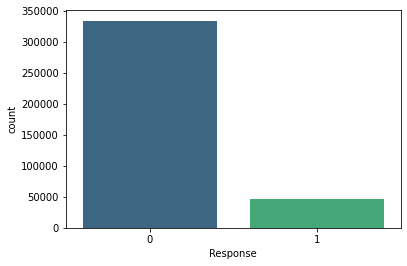

In [12]:
sns.countplot(df['Response'],palette="viridis")

In [13]:
print('Negative Responses %',(df['Response'].value_counts()[0]/len(df))*100)
print('Positive Responses %',(df['Response'].value_counts()[1]/len(df))*100)

Negative Responses % 87.74366388618479
Positive Responses % 12.256336113815209


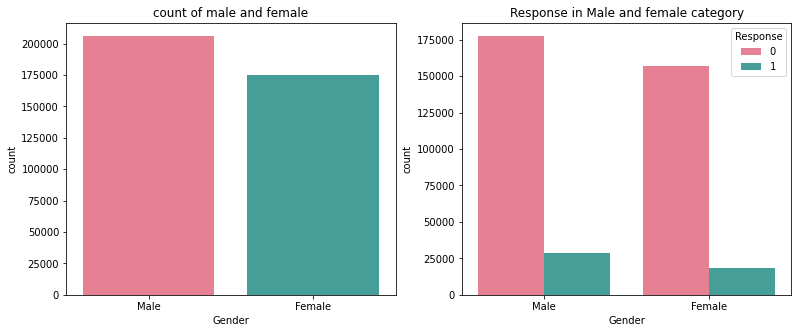

In [14]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(df['Gender'],palette='husl')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['Response'],palette="husl")
plt.title("Response in Male and female category")
plt.show()

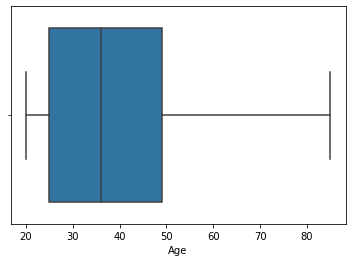

In [15]:
sns.boxplot(df['Age'])

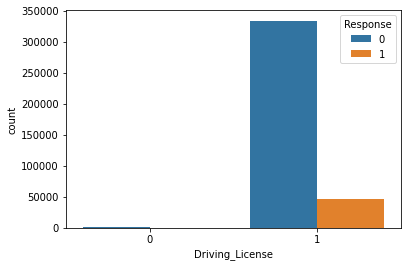

In [16]:
sns.countplot(df['Driving_License'],hue=df['Response'])

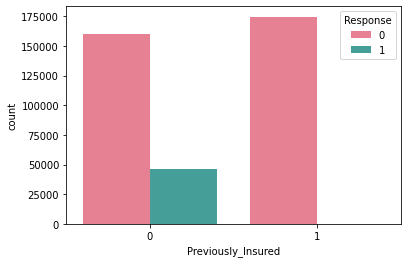

In [17]:
sns.countplot(x='Previously_Insured',hue='Response',data=df,palette='husl')

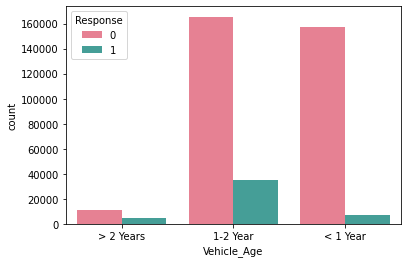

In [18]:
sns.countplot(x='Vehicle_Age',hue='Response',data=df,palette='husl')

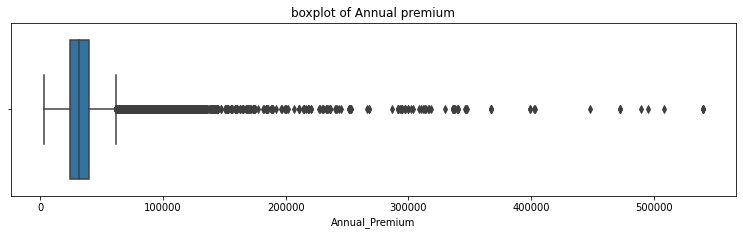

In [19]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

Text(0.5, 1.05, 'Pearson correlation of Features')

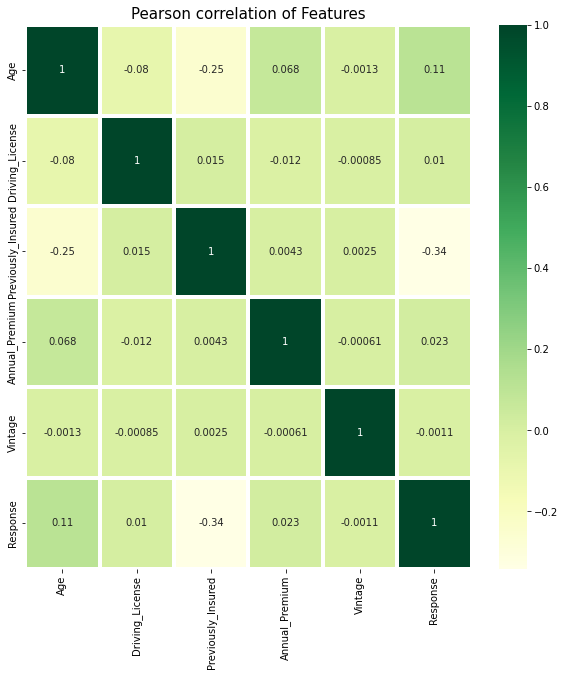

In [20]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

Text(0.5, 1.0, 'Gender vs Response')

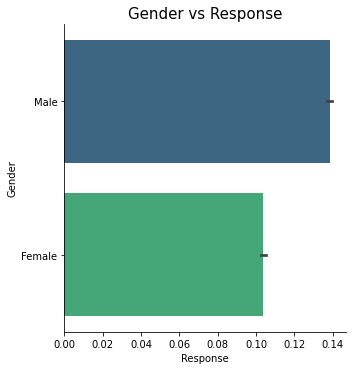

In [21]:
sns.catplot(x='Response',y='Gender',data=df,kind='bar',palette="viridis")
plt.title('Gender vs Response',fontsize=15)

In [22]:
#bin=np.linspace(min(df['Age']),max(df['Age']),5)
#groups=['Young_Age','Medium_Age','Old_Age','Senior_Citizen']
#df['Age-binned']=pd.cut(df['Age'],bins=bin,labels=groups)

Text(0, 0.5, 'Response')

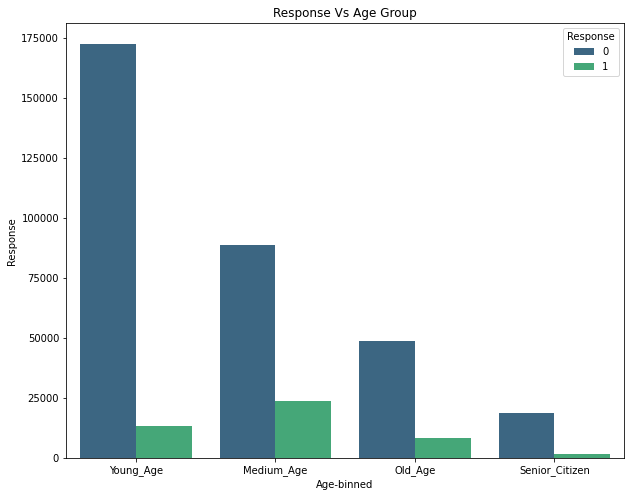

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(df['Age-binned'],hue=df['Response'],palette='viridis')
plt.title('Response Vs Age Group')
plt.ylabel('Response')

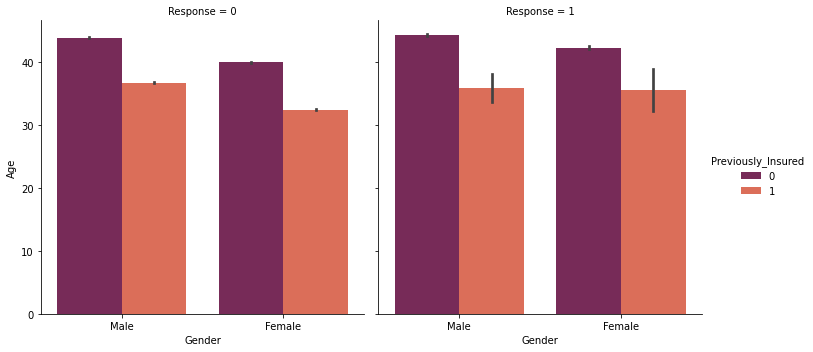

In [24]:
sns.catplot(x='Gender',y='Age',hue='Previously_Insured',col='Response',data=df,kind='bar',palette='rocket')

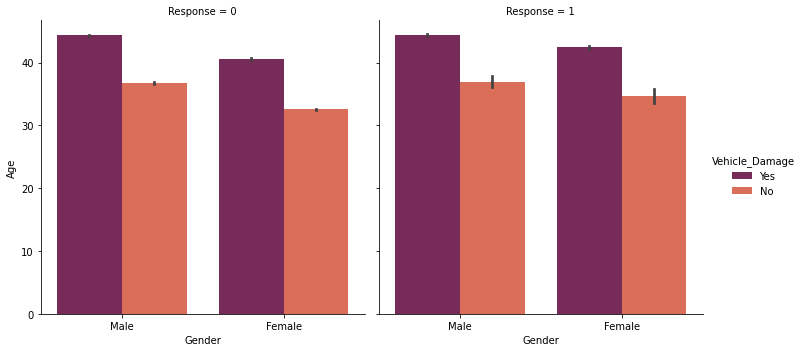

In [25]:
sns.catplot(x='Gender',y='Age',hue='Vehicle_Damage',col='Response',
            data=df,kind='bar',palette='rocket')

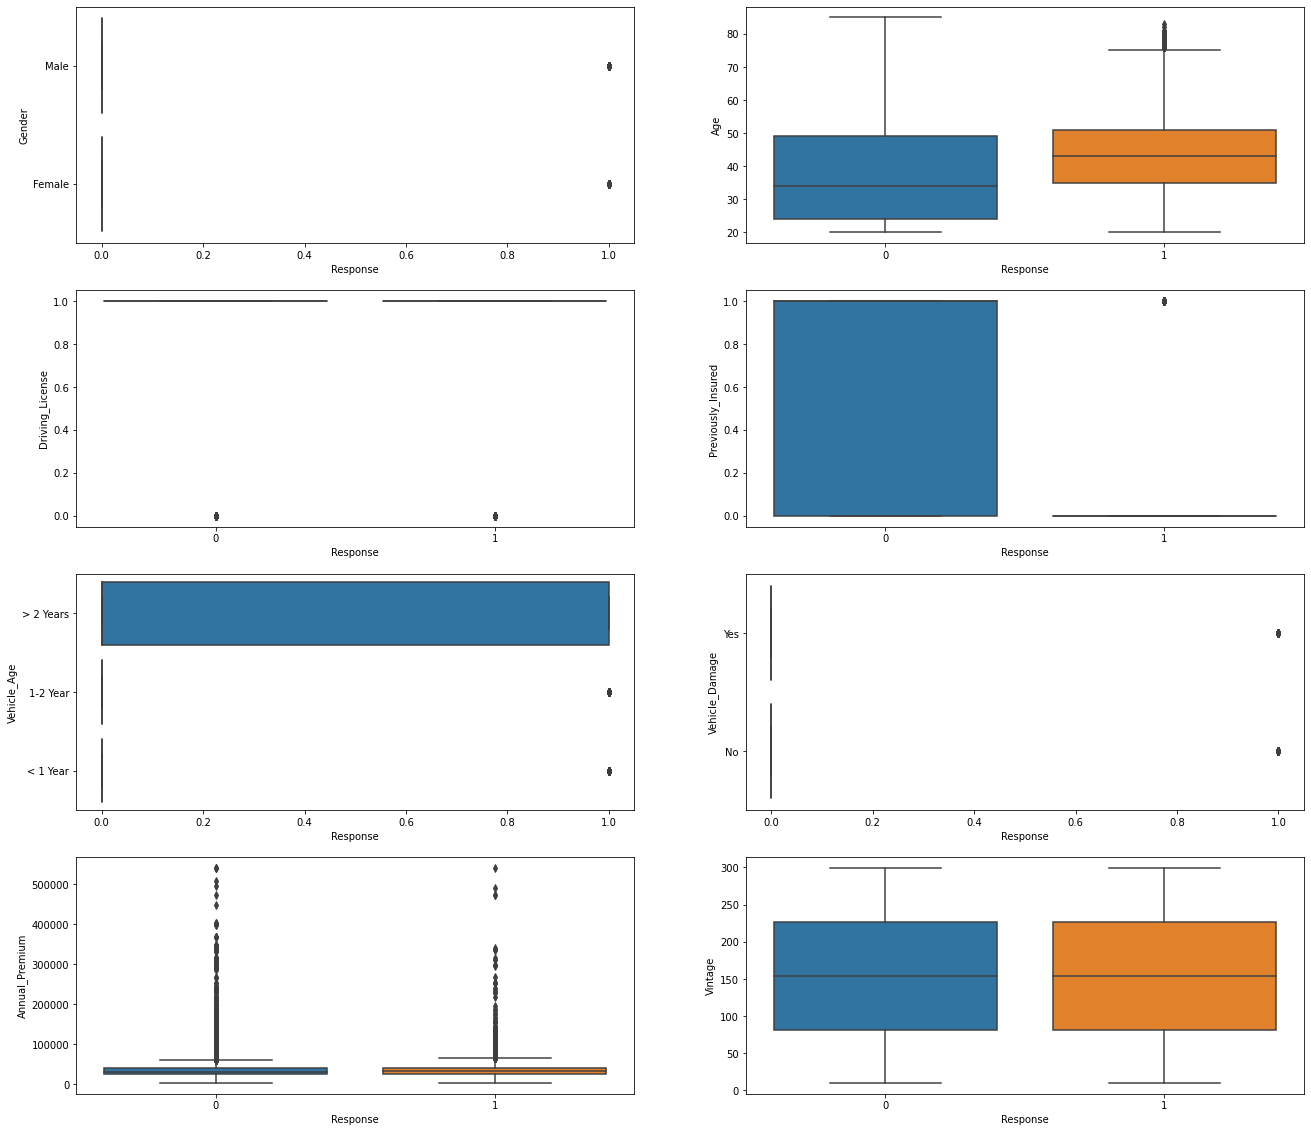

In [26]:
fig, axes = plt.subplots(4,2, figsize=(22,20))

sns.boxplot(ax=axes[0, 0], data=df, x='Response', y='Gender')
sns.boxplot(ax=axes[0, 1], data=df, x='Response', y='Age')
sns.boxplot(ax=axes[1, 0], data=df, x='Response', y='Driving_License')
sns.boxplot(ax=axes[1, 1], data=df, x='Response', y='Previously_Insured')
sns.boxplot(ax=axes[2, 0], data=df, x='Response', y='Vehicle_Age')
sns.boxplot(ax=axes[2, 1], data=df, x='Response', y='Vehicle_Damage')
sns.boxplot(ax=axes[3, 0], data=df, x='Response', y='Annual_Premium')
sns.boxplot(ax=axes[3, 1], data=df, x='Response', y='Vintage')

In [27]:
def outlier_treatment(datacolumn):
     sorted(datacolumn)
     Q1,Q3 = np.percentile(datacolumn , [25,75])
     IQR = Q3 - Q1
     lower_range = Q1 - (1.5 * IQR)
     upper_range = Q3 + (1.5 * IQR)
     return lower_range,upper_range

In [28]:
lowerbound,upperbound = outlier_treatment(df.Annual_Premium)

In [29]:
df[(df.Annual_Premium < lowerbound) | (df.Annual_Premium > upperbound)]
df.drop(df[ (df.Annual_Premium > upperbound) | (df.Annual_Premium < lowerbound) ].index , inplace=True)

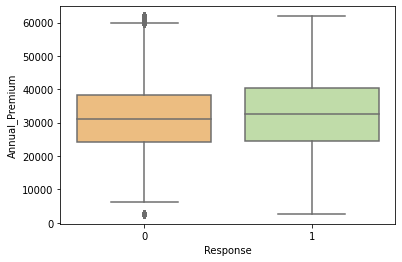

In [30]:
sns.boxplot( x='Response', y='Annual_Premium',data=df,palette='Spectral')

In [31]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

In [32]:
label = LabelEncoder()
df['Vehicle_Age']=label.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage']=label.fit_transform(df['Vehicle_Damage'])
df['Gender']=pd.get_dummies(df["Gender"],drop_first=True)

In [33]:
feature = [ 'Gender', 'Driving_License', 
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Vintage'
       'Response']

In [34]:
x=df.iloc[:,:-1]
y=df['Response']

In [35]:
from imblearn.over_sampling import RandomOverSampler

Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


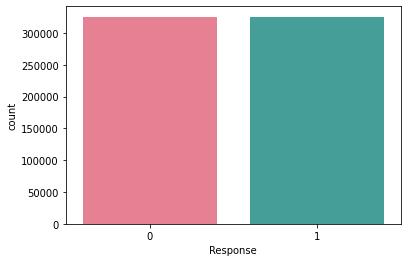

In [36]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.3,random_state=0)

In [38]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
lr=LogisticRegression(random_state = 666,n_jobs = -1)
clf_l = lr.fit(x_train,y_train)
y_pred_log = clf_l.predict(x_test)
print(accuracy_score(y_test,y_pred_log)*100)
print(roc_auc_score(y_test,y_pred_log)*100)

100.0
100.0


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

df_model1 = DecisionTreeClassifier()
df_model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
smote = SMOTE(random_state=1,n_jobs=-1)
x_sample,y_sample = smote.fit_resample(df.iloc[:,:-1],df['Response'])

In [42]:
x_frame = pd.DataFrame(x_sample,columns=['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
                              'Vehicle_Damage', 'Annual_Premium', 'Vintage'])
y_frame = pd.DataFrame(y_sample,columns=['Response'])

In [43]:
x1=x_frame.drop(['Driving_License'],axis=1,inplace=True)
x1=x_frame.copy()

In [44]:
y1=y_frame.copy()

In [45]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.5,random_state=42)

In [46]:
scaler = StandardScaler().fit(x_train1)
x_train_s = scaler.transform(x_train1)
x_test_s = scaler.transform(x_test1)

In [47]:
lr=LogisticRegression(random_state = 666,n_jobs = -1)
clf_l = lr.fit(x_train_s,y_train1)
y_pred_log = clf_l.predict(x_test_s)
print(accuracy_score(y_test1,y_pred_log)*100)
print(roc_auc_score(y_test1,y_pred_log)*100)

lr.score(x_train_s,y_train1)

77.28124213073573
77.25699526987557


0.7730396703046979

In [48]:
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

In [49]:
from sklearn.model_selection import GridSearchCV
model_logreg_tuned = GridSearchCV(estimator = logreg_tuning, param_grid = param_logreg, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')
model_logreg_tuned.fit(x_train_s, y_train1)
logreg_tuned = model_logreg_tuned.best_estimator_
y_tuned_logreg = logreg_tuned.predict(x_test_s)
logreg_tuned.score(x_train_s,y_train1)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


0.7730396703046979

In [50]:
DT_tuning = DecisionTreeClassifier()
param_DT =  {
    "max_depth": [None, 4,9,15,20,50],
    "min_samples_leaf": [ 1,4,0.1,2,10],
    "max_features" : [None, 0.2, 0.8, 2.0],
    "min_samples_split": [2,9,15,25]}

In [51]:
model_DT_tuned = GridSearchCV(estimator = DT_tuning, param_grid = param_DT, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'recall')
model_DT_tuned.fit(x_train_s,y_train1)
DT_tuned = model_DT_tuned.best_estimator_
y_tuned_DT = DT_tuned.predict(x_test_s)
DT_tuned.score(x_train_s,y_train1)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


0.7613793399952093